# **Análisis Exploratorio de los Datos (EDA)**

Importar librerías a utilizar.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Abrir archivos en dataframes.

In [3]:
df_accidentes = pd.read_csv(r'.\\data\\AccidentesAviones.csv', index_col=0)

Renombra las columnas para normalizar y empezar a analizar.

In [4]:
df_accidentes = df_accidentes.rename(columns={
    'HORA declarada': 'hora_declarada',
    'Ruta': 'ruta',
    'OperadOR': 'operador',
    'flight_no': 'numero_vuelo',
    'route': 'ruta_vuelo',
    'ac_type': 'tipo_aeronave',
    'registration': 'matricula',
    'cn_ln': 'cn_ln',
    'all_aboard': 'total_abordo',
    'PASAJEROS A BORDO': 'pasajeros_abordo',
    'crew_aboard': 'tripulacion_abordo',
    'cantidad de fallecidos': 'fallecidos_totales',
    'passenger_fatalities': 'fallecidos_pasajeros',
    'crew_fatalities': 'fallecidos_tripulacion',
    'ground': 'fallecidos_en_tierra',
    'summary': 'resumen'
})

### **Analizar valores faltantes o nulos**

- Verificar si hay valores nulos

In [5]:
df_accidentes.isnull()

,fecha,hora_declarada,ruta,operador,numero_vuelo,ruta_vuelo,tipo_aeronave,matricula,cn_ln,total_abordo,pasajeros_abordo,tripulacion_abordo,fallecidos_totales,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5004,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5005,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5006,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Conclusión:** Hay valores faltantes pero no están en formato nulo. Es necesario ver la forma de tomarlos como nulos.

- Reemplazar '?' por NaN en todo el DataFrame

In [6]:
df_accidentes.replace('?', np.nan, inplace=True)

- Calcular el porcentaje de valores nulos en cada columna y crear el gráfico.

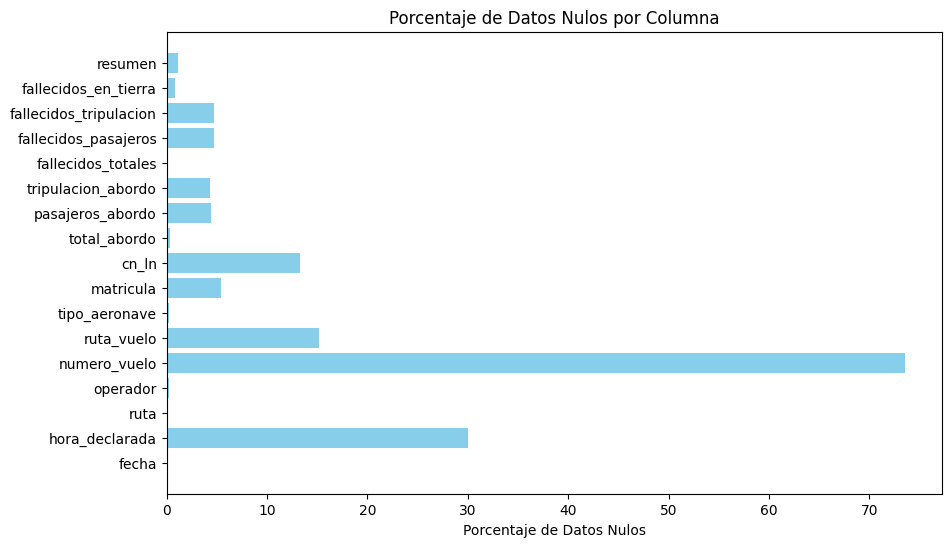

In [7]:
porcentaje_nulos = (df_accidentes.isnull().mean() * 100).round(2)

plt.figure(figsize=(10, 6))
plt.barh(porcentaje_nulos.index, porcentaje_nulos.values, color='skyblue')
plt.xlabel('Porcentaje de Datos Nulos')
plt.title('Porcentaje de Datos Nulos por Columna')
plt.show()

**Conclusión:** La columna numero_vuelo tal vez sea la que menos sirvan por su cantidad de datos nulos. Sin embargo no sería bueno eliminarlos porque quedaría un porcentaje de aproximado 25% de datos que si pueden servir.

- Crear un mapa de calor para visualizar los valores nulos.

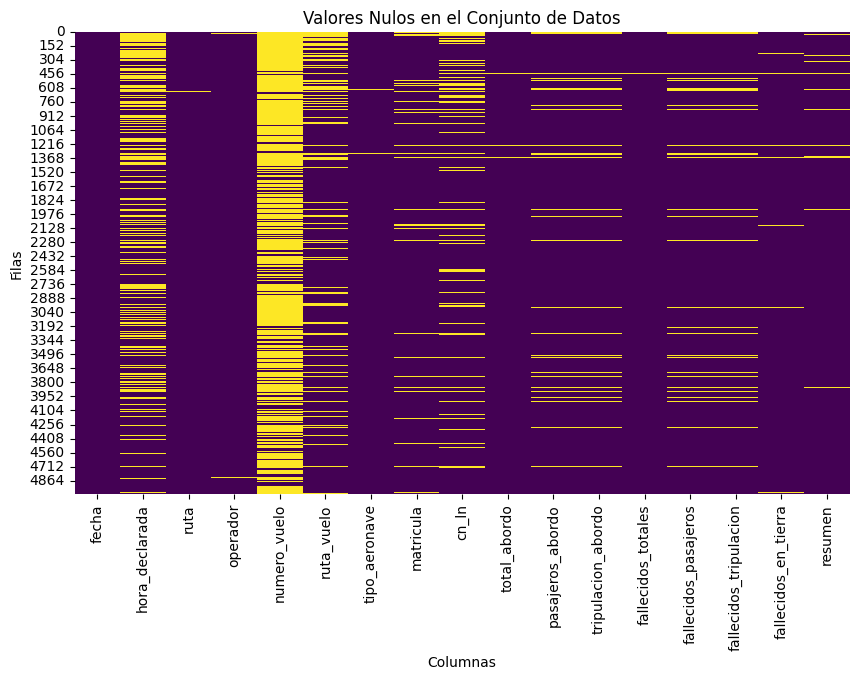

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_accidentes.isnull(), cbar=False, cmap='viridis')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.title('Valores Nulos en el Conjunto de Datos')
plt.show()

**Conclusión:** La mayor cantidad de datos nulos en las columnas hora_declarada y numero_vuelo se encuentran en las primeras filas, que serían los vuelos más antiguos.

- Verificar si hay filas con todas las columnas nulas.

In [9]:
filas_con_nulos = df_accidentes[df_accidentes.isnull().all(axis=1)]
filas_con_nulos

,fecha,hora_declarada,ruta,operador,numero_vuelo,ruta_vuelo,tipo_aeronave,matricula,cn_ln,total_abordo,pasajeros_abordo,tripulacion_abordo,fallecidos_totales,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen


**Conclusión:** No hay ninguna fila con todas las columnas nulas.

### **Buscar valores duplicados**

- Verificar duplicados en el Dataframe

In [10]:
duplicados = df_accidentes[df_accidentes.duplicated()]

duplicados.shape

(0, 17)

**Conclusión:** No hay valores duplicados en el dataframe.

### **Buscar y analizar outliers**

- Convertir la columna 'fecha' al formato datetime.

In [11]:
df_accidentes['fecha'] = pd.to_datetime(df_accidentes['fecha'], format='%B %d, %Y', errors='coerce')

- Buscar outliers en la columna fecha.

Ordenar por fechas en orden ascendente y ver si hay fechas fuera del rango esperado.

In [12]:
df_accidentes = df_accidentes.sort_values(by='fecha', ascending=True)
df_accidentes

,fecha,hora_declarada,ruta,operador,numero_vuelo,ruta_vuelo,tipo_aeronave,matricula,cn_ln,total_abordo,pasajeros_abordo,tripulacion_abordo,fallecidos_totales,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,1835,"Near Butte, Alaska",Soloy Helicopters,NaN,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NaN,NaN,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,NaN,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,2021-07-04,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,NaN,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."


**Conclusión:** No hay fechas fuera del rango esperado, y están en orden ascendente, es decir que NO hay outliers en esta columna.

### **Análizar la relación existente entre los datos**

- Relación entre cantidad de vuelos, pasajeros y fallecimientos por década.

In [13]:
# Convertir las columnas a tipo int
columnas_a_convertir = ['total_abordo', 'pasajeros_abordo', 'tripulacion_abordo', 'fallecidos_totales', 'fallecidos_pasajeros', 'fallecidos_tripulacion', 'fallecidos_en_tierra']
for columna in columnas_a_convertir:
    df_accidentes[columna] = df_accidentes[columna].str.replace(',', '').fillna(0).astype(int)

**Aclaración:** Teniendo en cuenta que los datos nulos de las columnas de conteo de personas y fallecidos significan *solamente un 3%* sobre total, los tranformo a 0 para poder analizar posteriormente.

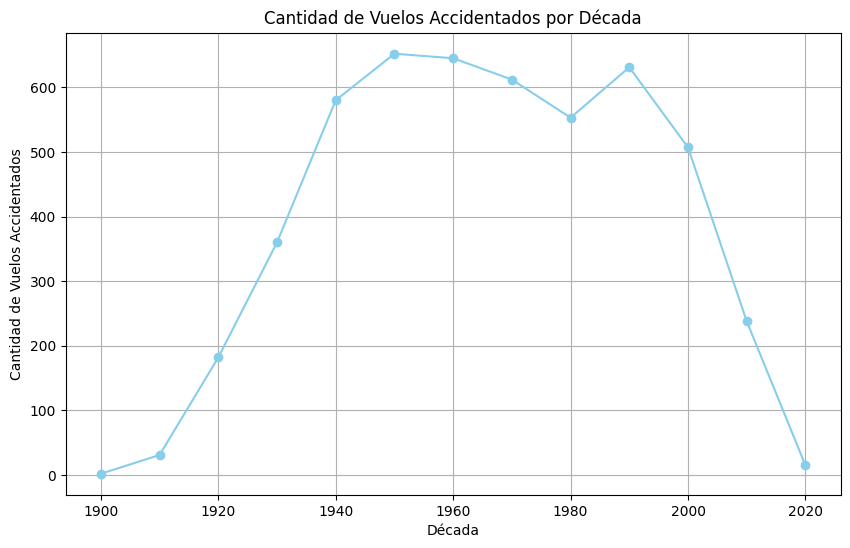

In [14]:
# Convertir la columna 'fecha' a formato datetime
df_accidentes['fecha'] = pd.to_datetime(df_accidentes['fecha'], errors='coerce')

# Extraer el año y calcular la década
df_accidentes['decada'] = (df_accidentes['fecha'].dt.year // 10) * 10

# Contar la cantidad de vuelos por década
vuelos_por_decada = df_accidentes.groupby('decada').size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(vuelos_por_decada.index, vuelos_por_decada.values, marker='o', color='skyblue')
plt.xlabel('Década')
plt.ylabel('Cantidad de Vuelos Accidentados')
plt.title('Cantidad de Vuelos Accidentados por Década')
plt.grid(True)  # Agregamos una cuadrícula para mejor visualización
plt.show()

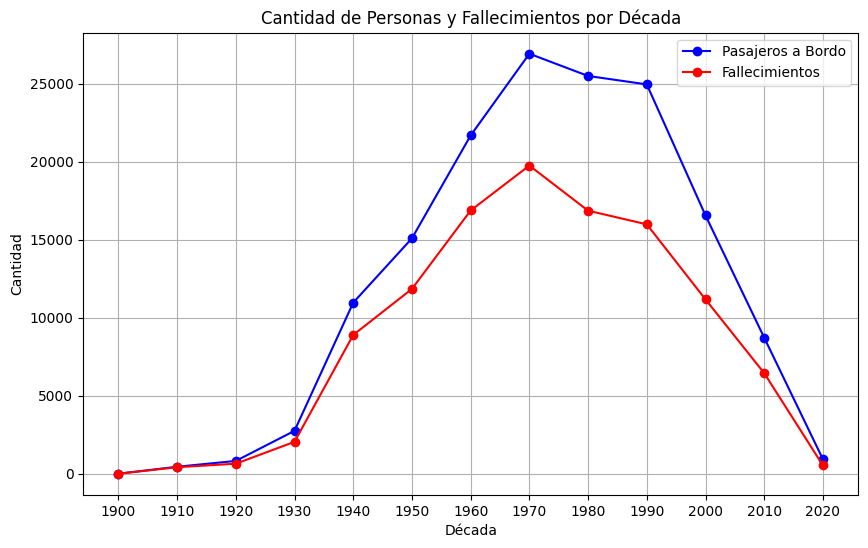

In [15]:
# Agrupar por década y sumar la cantidad de pasajeros y fallecimientos
pasajeros_por_decada = df_accidentes.groupby('decada')['total_abordo'].sum()
fallecimientos_por_decada = df_accidentes.groupby('decada')['fallecidos_totales'].sum()

# Definir el rango de las décadas
decadas = pasajeros_por_decada.index

# Crear el gráfico de líneas múltiples
plt.figure(figsize=(10, 6))

# Línea de pasajeros
plt.plot(decadas, pasajeros_por_decada, marker='o', label='Pasajeros a Bordo', color='b')

# Línea de fallecimientos
plt.plot(decadas, fallecimientos_por_decada, marker='o', label='Fallecimientos', color='r')

# Añadir etiquetas y leyenda
plt.xlabel('Década')
plt.ylabel('Cantidad')
plt.title('Cantidad de Personas y Fallecimientos por Década')
plt.xticks(decadas)
plt.legend()

# Mostrar el gráfico
plt.grid(True)  # Agregamos una cuadrícula para mejor visualización
plt.show()

**Conclusión:** Entre las décadas de 1940 y 2000 se registran la mayor cantidad de vuelos accidentados (+500). Sin embargo, la mayor cantidad de pasajeros y fallecidos son entre 1960 y 1990 comenzando a descender drásticamente desde los 2000 en adelante.

- Relación entre total de personas a bordo y fallecidos totales.

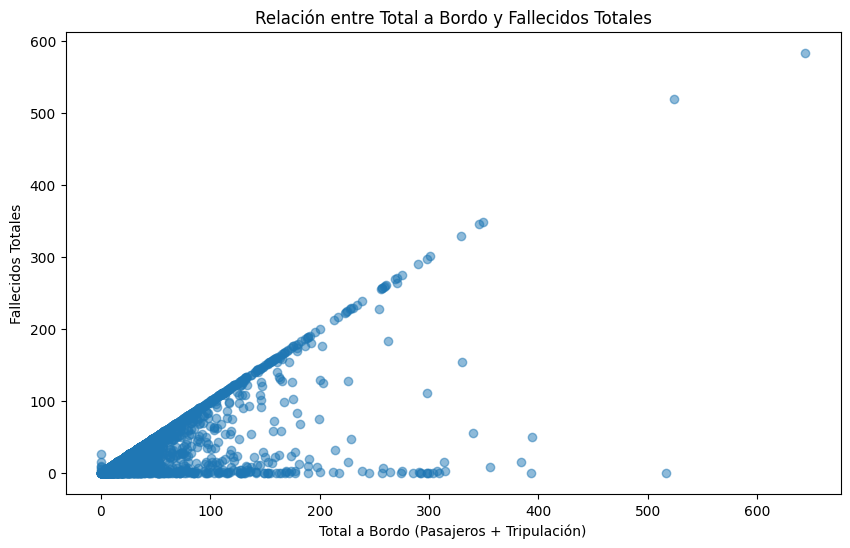

In [16]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_accidentes['total_abordo'], df_accidentes['fallecidos_totales'], alpha=0.5)
plt.xlabel('Total a Bordo (Pasajeros + Tripulación)')
plt.ylabel('Fallecidos Totales')
plt.title('Relación entre Total a Bordo y Fallecidos Totales')
plt.show()

**Conclusión:** La concentración de fallecimientos es más notable en accidentes con menos de 100 personas a bordo. Esto sugiere que la seguridad en los vuelos con menor ocupación podría requerir una atención especial para minimizar los riesgos de lesiones y fallecimientos. Sin embargo, seguiremos analizando otros factores para entender con más claridad.

- Relación entre tipos de aeronave con cantidad de accidentes y décadas.

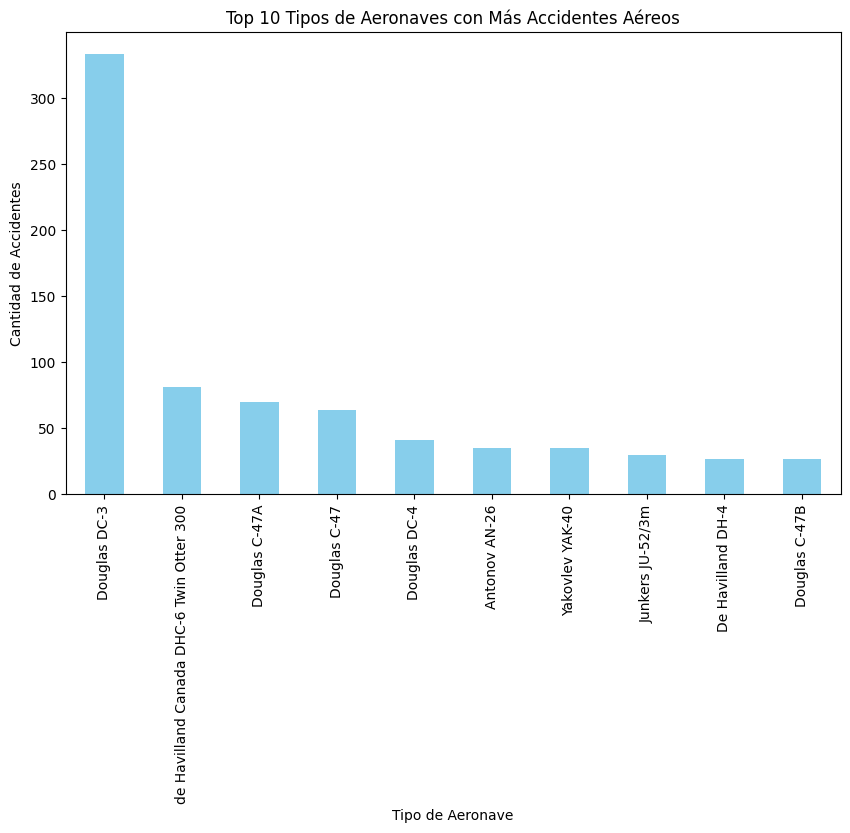

In [17]:
# Agrupar por tipo de aeronave y contar la cantidad de accidentes
top_aeronaves = df_accidentes['tipo_aeronave'].value_counts().nlargest(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
top_aeronaves.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Cantidad de Accidentes')
plt.title('Top 10 Tipos de Aeronaves con Más Accidentes Aéreos')
plt.show()

In [18]:
# Encontrar el tipo de aeronave más accidentado por década
tipo_aeronave_mas_accidentada_por_decada = df_accidentes.groupby(['decada', 'tipo_aeronave'])['fecha'].count().reset_index()
tipo_aeronave_mas_accidentada_por_decada = tipo_aeronave_mas_accidentada_por_decada.sort_values(by=['decada', 'fecha'], ascending=[True, False])
tipo_aeronave_mas_accidentada_por_decada = tipo_aeronave_mas_accidentada_por_decada.drop_duplicates(subset='decada', keep='first')

# Mostrar la tabla
tipo_aeronave_mas_accidentada_por_decada[['decada', 'tipo_aeronave']]

,decada,tipo_aeronave
0,1900,Wright Byplane
6,1910,De Havilland DH-4
41,1920,Breguet 14
246,1930,Junkers JU-52/3m
486,1940,Douglas DC-3
794,1950,Douglas DC-3
1134,1960,Douglas DC-3
1508,1970,Douglas DC-3
2090,1980,de Havilland Canada DHC-6 Twin Otter 300
2504,1990,de Havilland Canada DHC-6 Twin Otter 300


**Conclusión:** Las aeronaves Douglas DC-3 y DHC-6 Twin Otter fueron los modelos que más accidentes causaron en las décadas con más accidentes. Su popularidad era altísima y ambos eran para llevar pasajeros a bordo, este dato explica la cantidad de fallecidos durante esas décadas.

- Relación entre operadores, cantidad de accidentes y fallecimientos.

In [19]:
# Eliminar filas con valores nulos en la columna 'operador'
df_accidentes = df_accidentes.dropna(subset=['operador'])

# Filtrar los operadores que contienen 'Military'
operadores_military_us = df_accidentes[df_accidentes['operador'].str.contains('Military')]['operador'].unique()
operadores_military_us

array(['Military - U.S. Army', 'Military - U.S. Navy',
       'Military - German Navy', 'Military - German Army',
       'Military - Royal Australian Air Force',
       'Military - Royal Airship Works',
       'Military - U.S. Army Air Service', 'Military - French Navy',
       'Maddux Airlines / Military - U.S.Army Air Force',
       'Military - British Air Ministry', 'Military - US Navy',
       'Military - Fuerza Aerea Colombiana',
       'Military - U.S. Navy / Military - U.S. Navy',
       'Military - Ecuadorian Air Force', 'Military -Royal Air Force',
       'Military - Royal Air Force', 'Military - U.S. Army Air Force',
       'Military - U.S. Army Air Forces',
       'American Airlines / Military - USAF', 'Military - U.S. Air Force',
       'Military - Royal Canadian Air Force',
       'Military - Indian Air Force',
       'Military - U.S. Army Air Forces / Military - U.S. Army Air Forces',
       'Military - Royal Netherlands East Indies Air Force',
       'Military - U.S. Arm

Normalizamos operadores militares estadounidenses debido a que tienen nombres muy diferentes para la misma institución.

In [20]:
# Filtrar los operadores que contienen 'Military - U.S.'
operadores_military_us = df_accidentes[df_accidentes['operador'].str.contains('Military - U.S.')]
operadores_military_unitedstates = df_accidentes[df_accidentes['operador'].str.contains('Military - United States')]

# Normalizar los nombres de los operadores
df_accidentes.loc[operadores_military_us.index, 'operador'] = 'Military U.S.'
df_accidentes.loc[operadores_military_unitedstates.index, 'operador'] = 'Military U.S.'

c:\Users\Joaquin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


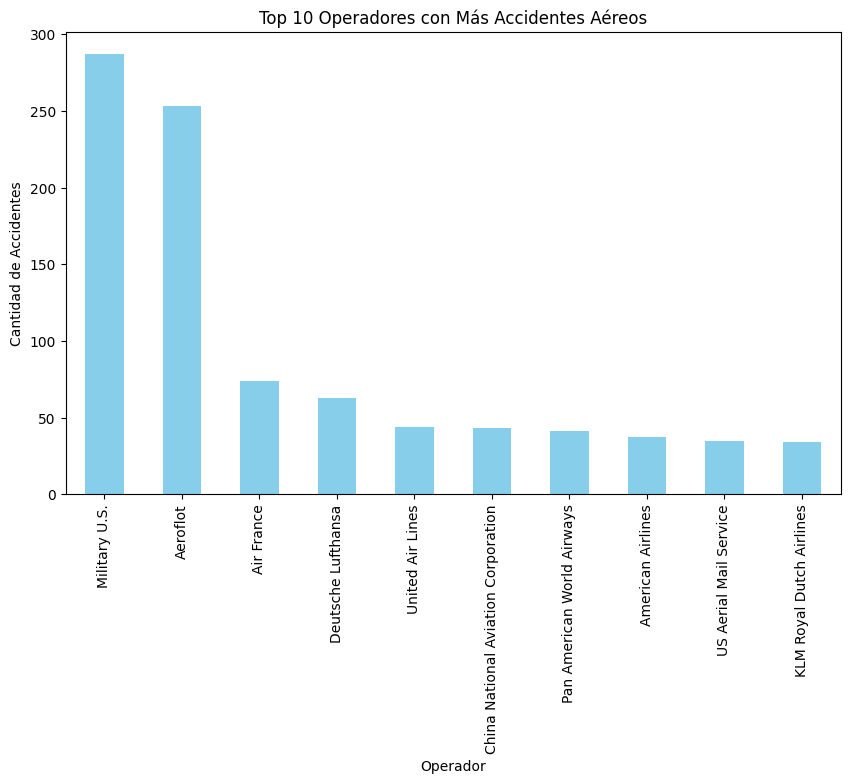

In [21]:
# Encontrar los 10 operadores con más accidentes aéreos
top_operadores = df_accidentes['operador'].value_counts().nlargest(10)

# Crear el gráfico de barras para accidentes
plt.figure(figsize=(10, 6))
top_operadores.plot(kind='bar', color='skyblue')
plt.xlabel('Operador')
plt.ylabel('Cantidad de Accidentes')
plt.title('Top 10 Operadores con Más Accidentes Aéreos')
plt.show()

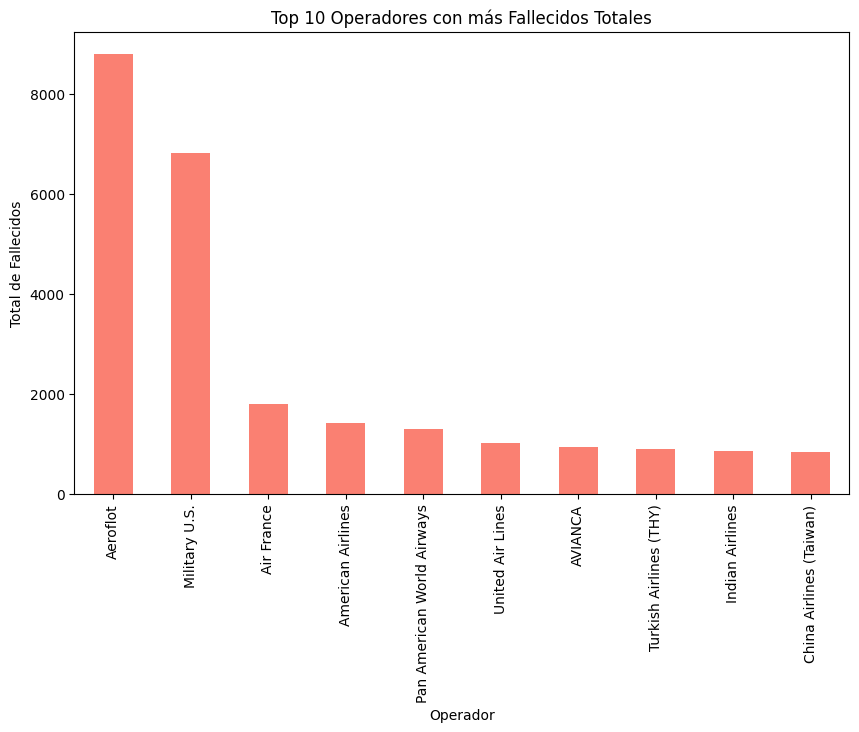

In [22]:
# Encontrar los operadores con más fallecidos totales
top_operadores_fallecidos = df_accidentes.groupby('operador')['fallecidos_totales'].sum().nlargest(10)

# Crear el gráfico de barras para fallecidos
plt.figure(figsize=(10, 6))
top_operadores_fallecidos.plot(kind='bar', color='salmon')
plt.xlabel('Operador')
plt.ylabel('Total de Fallecidos')
plt.title('Top 10 Operadores con más Fallecidos Totales')
plt.show()

**Conclusión:** A pesar de que el ejército militar de Estados Unidos es el operador con más accidentes, no es el operador con más fallecidos ya que el primer lugar se lo lleva Aeroflot. Esto es debido a que Aeroflot es de vuelos comerciales, por lo tanto, lleva más pasajeros.

- Comparación de Fallecidos en Tierra y enfoque en la década del 2000.

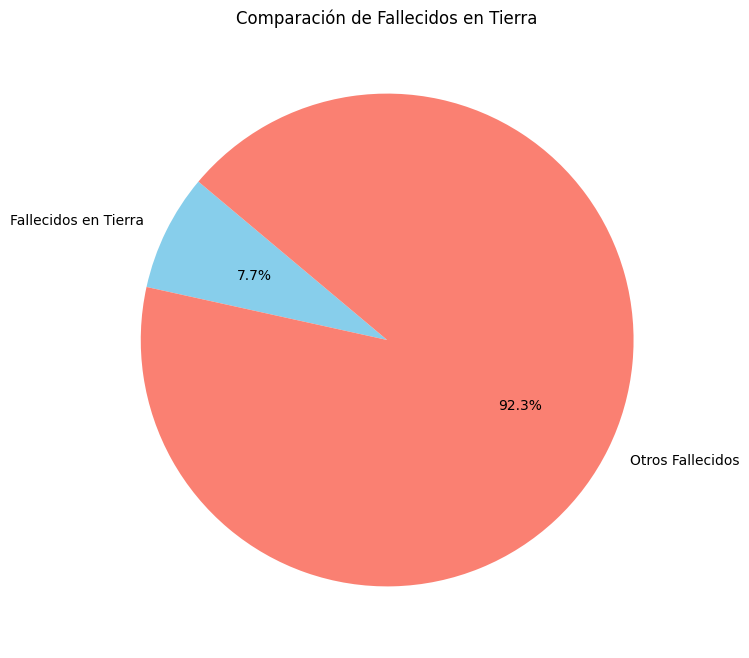

In [23]:
# Calcular la cantidad de fallecidos en tierra y en otros lugares
fallecidos_tierra = df_accidentes['fallecidos_en_tierra'].sum()
fallecidos_otros = df_accidentes['fallecidos_totales'].sum() - fallecidos_tierra

# Etiquetas y valores para el gráfico
etiquetas = ['Fallecidos en Tierra', 'Otros Fallecidos']
valores = [fallecidos_tierra, fallecidos_otros]

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Comparación de Fallecidos en Tierra')
plt.show()

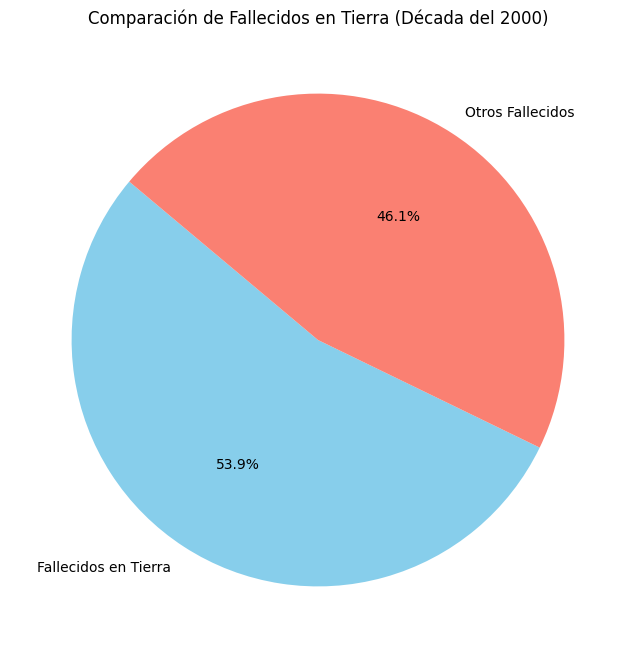

In [25]:
# Filtrar el DataFrame para incluir solo la década del 2000
df_2000s = df_accidentes[(df_accidentes['decada'] >= 2000) & (df_accidentes['decada'] < 2010)]

# Calcular la cantidad de fallecidos en tierra y en otros lugares en la década del 2000
fallecidos_tierra_2000s = df_2000s['fallecidos_en_tierra'].sum()
fallecidos_otros_2000s = df_2000s['fallecidos_totales'].sum() - fallecidos_tierra_2000s

# Etiquetas y valores para el gráfico
etiquetas = ['Fallecidos en Tierra', 'Otros Fallecidos']
valores = [fallecidos_tierra_2000s, fallecidos_otros_2000s]

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Comparación de Fallecidos en Tierra (Década del 2000)')
plt.show()

**Conclusión:** Históricamente, los fallecidos en tierra son un porcentaje muy bajo en comparación al resto de fallecidos. Sin embargo, tomando la década del 2000, encontramos el 11/9/2001 la cual es la fecha del atentado a Torres Gemelas que registró muchos fallecidos en tierra. Eso es lo que muestra el gráfico.

### **KPI: Reducción de la Tasa de Fatalidad**

Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior.

La tasa de fatalidad de la tripulación se define como el número total de tripulantes fallecidos en los accidentes registrados en la década a considerar, dividido en la cantidad total de accidentes aéreos ocurridos en este período de tiempo.

In [35]:
# Define las décadas que queremos analizar
decada_actual = 2020
decada_anterior = 2010

# Calcula la tasa de fatalidad de la tripulación en la década actual
fallecidos_actual = df_accidentes[df_accidentes['decada'] == decada_actual]['fallecidos_totales'].sum()
vuelos_actual = df_accidentes[df_accidentes['decada'] == decada_actual].shape[0]
tasa_tripulacion_actual = fallecidos_actual / vuelos_actual

# Calcula la tasa de fatalidad de la tripulación en la década anterior
fallecidos_anterior = df_accidentes[df_accidentes['decada'] == decada_anterior]['fallecidos_totales'].sum()
vuelos_anterior = df_accidentes[df_accidentes['decada'] == decada_anterior].shape[0]
tasa_tripulacion_anterior = fallecidos_anterior / vuelos_anterior

# Calcula la reducción necesaria para cumplir el objetivo del 10%
reduccion_necesaria = tasa_tripulacion_anterior * 0.1

# Compara la tasa actual con la tasa anterior y determina si se cumplió el objetivo
cumplio_objetivo = tasa_tripulacion_actual <= tasa_tripulacion_anterior - reduccion_necesaria

# Muestra los resultados
print(f"Tasa de fatalidad de la tripulación en la década actual: {tasa_tripulacion_actual}")
print(f"Tasa de fatalidad de la tripulación en la década anterior: {tasa_tripulacion_anterior}")
print(f"¿Se cumplió el objetivo del 10%?: {cumplio_objetivo}")

Tasa de fatalidad de la tripulación en la década actual: 35.53333333333333
Tasa de fatalidad de la tripulación en la década anterior: 27.189873417721518
¿Se cumplió el objetivo del 10%?: False


### **KPI: Reducción de la Tasa de Supervivencia**
Evaluar el incremento del 5% en la tasa de sobrevivientes en los últimos 10 años, comparado a la década anterior.

In [28]:
# Define las décadas que queremos analizar
decada_actual = 2020
decada_anterior = 2010

# Calcula la tasa de sobrevivientes en la década actual
tasa_sobrevivientes_actual = 1 - (df_accidentes[df_accidentes['decada'] == decada_actual]['fallecidos_totales'].sum() / df_accidentes[df_accidentes['decada'] == decada_actual]['total_abordo'].sum())

# Calcula la tasa de sobrevivientes en la década anterior
tasa_sobrevivientes_anterior = 1 - (df_accidentes[df_accidentes['decada'] == decada_anterior]['fallecidos_totales'].sum() / df_accidentes[df_accidentes['decada'] == decada_anterior]['total_abordo'].sum())

# Calcula el incremento necesario para cumplir el objetivo del 5%
incremento_necesario = tasa_sobrevivientes_anterior * 0.05

# Compara la tasa actual con la tasa anterior y determina si se cumplió el objetivo
cumplio_objetivo = tasa_sobrevivientes_actual >= tasa_sobrevivientes_anterior + incremento_necesario

# Muestra los resultados
print(f"Tasa de sobrevivientes en la década actual: {tasa_sobrevivientes_actual * 100}")
print(f"Tasa de sobrevivientes en la década anterior: {tasa_sobrevivientes_anterior * 100}")
print(f"¿Se cumplió el objetivo del 5%?: {cumplio_objetivo}")

Tasa de sobrevivientes en la década actual: 42.68817204301075
Tasa de sobrevivientes en la década anterior: 26.083964211975218
¿Se cumplió el objetivo del 5%?: True


#### ***Extra:* Conectar a mysql.**

In [130]:
# Define el orden de las columnas
column_order = [
    'decada',
    'fecha',
    'hora_declarada',
    'ruta',
    'operador',
    'numero_vuelo',
    'ruta_vuelo',
    'tipo_aeronave',
    'matricula',
    'cn_ln',
    'total_abordo',
    'pasajeros_abordo',
    'tripulacion_abordo',
    'fallecidos_totales',
    'fallecidos_pasajeros',
    'fallecidos_tripulacion',
    'fallecidos_en_tierra',
    'resumen'
]

# Reordena las columnas del DataFrame
df_accidentes = df_accidentes[column_order]

# Convertir a 0 datos nulos para cargar a mySQL
df_accidentes = df_accidentes.fillna(0)

In [134]:
import pymysql

# Establece la conexión a tu base de datos
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='1234',
    database='accidentes_aereos',
    charset='utf8mb4'
)

# Define los datos que deseas insertar (en este caso, asumiendo que 'df' es tu DataFrame)
df_values = df_accidentes.values.tolist()

# Define la consulta SQL para la inserción
insert_query = """
    INSERT INTO accidentes
    (decada, fecha, hora_declarada, ruta, operador, numero_vuelo, ruta_vuelo,
    tipo_aeronave, matricula, cn_ln, total_abordo, pasajeros_abordo,
    tripulacion_abordo, fallecidos_totales, fallecidos_pasajeros,
    fallecidos_tripulacion, fallecidos_en_tierra, resumen)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Intenta ejecutar la inserción
try:
    with conn.cursor() as cursor:
        cursor.executemany(insert_query, df_values)
        conn.commit()
        print(f'Se insertaron {cursor.rowcount} filas correctamente.')
except Exception as e:
    print(f'Error al insertar: {e}')
    conn.rollback()
finally:
    conn.close()

Se insertaron 4998 filas correctamente.
